### Machine Learning Algorithm:
___

* from **IBM corporation Course by:(Sr.Data Scientist Saeed Aghabozorgi)**
* coding by: **(Ahmad Ahmadi)**
___
### 4) K-Nearest Neighobrs (KNN):

- it's a `supervised`  learning algorithm.
- data is trained with each data point coressponding to their `classification.`
<br>
<img src="https://miro.medium.com/max/376/1*rLz1WJep3X8HMJZbXsvrXg.png" />
<caption><center> <u><b> Figure 1</u></b> : K-NN Algorithm<br> </center></caption>
<br>

- **in this case,** we have data points of `Class (A)` and `Class (B)`;
- we want to predict,which Class the question mark (test data) (`displayed in figure 1`) belongs to?
- if we consider a k of value 3 `(k = 3)`, meaning three nearest data point, we will get prediction of Class (B).
- if we consice a k of value 7 `(k = 7)`, meaning seven nearest data point, we will get predicion of Class (A).
- because the **majority** of data points classes within K nearest neighbors, defining the Class of prediction.

<br>
<img src="https://miro.medium.com/max/650/1*OyYyr9qY-w8RkaRh2TKo0w.png" />
<caption><center><u><b> Figure 2 </u></b>: K-NN Algorithm<br></center></caption>
<br>

In [1]:
# importing packages:
# pandas = for reading data sheet:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn:
from sklearn import metrics             # for evaluation of model:
from sklearn import preprocessing   # for preprocessing and standardization of  inputs data.
from sklearn.neighbors import KNeighborsClassifier             # selection the model algotrithm.
from sklearn.model_selection import train_test_split           # split data to train and test


In [2]:
# reading data using pandas:
excel_data = pd.read_excel('tele_cust.xlsx')


In [3]:
# looking at 10 rows of dataset:
excel_data.head(10)

,region,tenure,age,marital,address,income,education,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
5,2,41,39,0,17,78,2,16,0,1,1,3
6,3,45,22,1,2,19,2,4,0,1,5,2
7,2,38,35,0,5,76,2,10,0,0,3,4
8,3,45,59,1,7,166,4,31,0,0,5,3
9,1,68,41,1,21,72,1,22,0,0,3,2


In [4]:
# statistical features of data (i.e : mean, median, std and ...)
excel_data.describe()

,region,tenure,age,marital,address,income,education,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
# numbers of each class in our dataset:
excel_data['custcat'].value_counts()    # custcat = customer category [1, 2, 3, 4]

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

___

- This means;
 - we have **281 numbers of Class (3)**
 - we have **266 numbers of Class (1)**
 - and so on ...
 ____

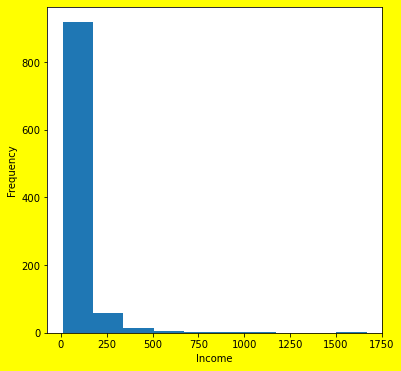

In [6]:
# plotting data:
plt.figure(figsize=(6, 6), facecolor='yellow')   # size of output plot 
plt.hist(excel_data[['income']], bins=10)       # histogram plot
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

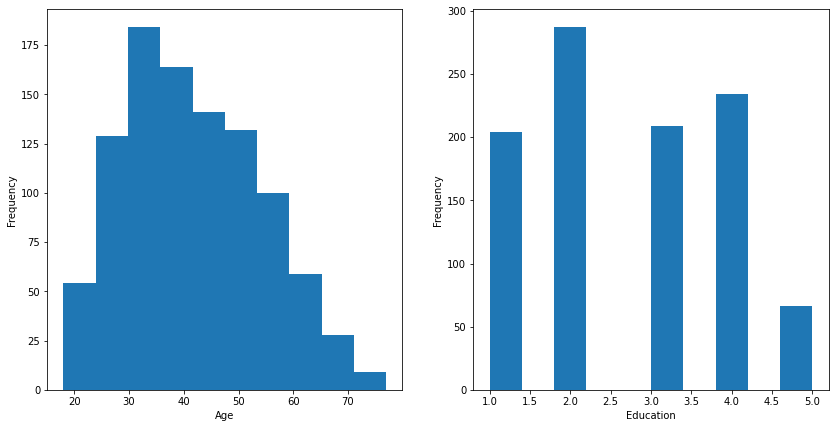

In [7]:
# plotting data (age, education)

plt.subplots(figsize=(14, 7))     # defining size of output plots.

plt.subplot(1, 2, 1)                  # used to plot multiple plots.
plt.hist(excel_data[['age']])
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(excel_data[['education']])
plt.xlabel('Education')
plt.ylabel('Frequency')

plt.show()

___
- to convert pandas DataFrame data into numpy array we can use:<br>
1) **DataFrame.values**<br>
2) **DataFrame.to_numpy()**<br>
3) **np.asarray(DataFrame)**<br>
___

In [8]:
x_inp = excel_data[['region', 'tenure','age', 'marital', 'address', 'income', 'education',
                              'employ','retire', 'gender', 'reside']].values   # to convert datafram(excel_data) to numpy array (x_inp)

print("input data:\n", x_inp[5, :], "\n")
y_out = excel_data[['custcat']].values     # custcat = customer category
y_out =y_out.reshape(y_out.shape[0] * y_out.shape[1], ) # reshape to 1d array 
print('output: \n', y_out[0:5], '\n')

# shape of our data:
print('input shape = ', x_inp.shape, '\n')
print('output shape = ', y_out.shape, '\n')


input data:
 [ 2 41 39  0 17 78  2 16  0  1  1] 

output: 
 [1 4 3 1 3] 

input shape =  (1000, 11) 

output shape =  (1000,) 



___
- data standardization gives data, **zero mean** ($\mu = 0$) and **unit standard deviation** ($\sigma = 1$)
- to do so, in the following cell;  We'll write:
- **preprocessing.StandardScaler().fit(input_name)** 
- and to change this object to numpy array we use: **.transform()**
___

In [9]:
# Standardization of Data:
x_inp = preprocessing.StandardScaler().fit(x_inp).transform(x_inp.astype(float))
print('standard data: \n\n', x_inp, '\n')

mean = np.mean(x_inp)
standard_dev = np.std(x_inp)

print('mean of standard data:\n', mean, '~ zero','\n')
print('std of standard data:\n', standard_dev)

standard data: 

 [[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]] 

mean of standard data:
 3.132847516760442e-17 ~ zero 

std of standard data:
 1.0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_inp, y_out, test_size=0.2, random_state=4)

print('we have 1000 total <Data> befor train-test split:')
print('<==========>')
print('shape of x train = ', x_train.shape)
print('shape of x test =', x_test.shape)
print('shape of y train = ', y_train.shape)
print('shape of y test = ', y_test.shape)
print('<==========>')

we have 1000 total <Data> befor train-test split:
<==========>
shape of x train =  (800, 11)
shape of x test = (200, 11)
shape of y train =  (800,)
shape of y test =  (200,)
<==========>


In [11]:
# creating our K-NN model: (K = 4)
k = 4
KNN_model_1 = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
KNN_model_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
# prediction of test data using K-NN: (K = 4)
y_hat_tr1 = KNN_model_1.predict(x_train)
y_hat_te1 = KNN_model_1.predict(x_test)

In [13]:
# evaluation of the Model: (K = 4)
model_acc_train1 = metrics.accuracy_score(y_train, y_hat_tr1)
model_acc_test1 = metrics.accuracy_score(y_test, y_hat_te1)

print('the Accuracy for train: ', model_acc_train1 * 100, '%', '\n')
print('the Accuracy for test: ', model_acc_test1 * 100, '%', '\n')

the Accuracy for train:  54.75 % 

the Accuracy for test:  32.0 % 



In [14]:
# creating another K-NN model: (K = 6)
k = 6
KNN_model_2 = KNeighborsClassifier(n_neighbors = k)
KNN_model_2.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [15]:
# prediction of test data using K-NN (K = 6):
y_hat_tr2 = KNN_model_2.predict(x_train)
y_hat_te2 =KNN_model_2.predict(x_test)

In [16]:
# evaluation of the Model: (K = 6)
model_acc_train2 = metrics.accuracy_score(y_train, y_hat_tr2)
model_acc_test2 = metrics.accuracy_score(y_test, y_hat_te2)

print('the Accuracy for train: ', model_acc_train2 * 100, '%', '\n')
print('the Accuracy for test: ', model_acc_test2 * 100, '%', '\n')

the Accuracy for train:  51.625 % 

the Accuracy for test:  31.0 % 



___

- let's create KNN models, in which K varies from 1 to K = defined by the user:
___

In [17]:
#  Run to see what's happen :)))
k = int(input('Enter K for the model: '))
accuracy_mat = np.zeros((k-1))

for i in range(1, k):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    yhat_tr = KNN_model.fit(x_train, y_train)
    yhat_te = KNN_model.predict(x_test)
    model_acc = metrics.accuracy_score(y_test, yhat_te) *100
    accuracy_mat[i-1] = model_acc
    print('accuracy for', '(k =', i, ')', '= %.2f' % model_acc, '%')


Enter K for the model: 10
accuracy for (k = 1 ) = 30.00 %
accuracy for (k = 2 ) = 29.00 %
accuracy for (k = 3 ) = 31.50 %
accuracy for (k = 4 ) = 32.00 %
accuracy for (k = 5 ) = 31.50 %
accuracy for (k = 6 ) = 31.00 %
accuracy for (k = 7 ) = 33.50 %
accuracy for (k = 8 ) = 32.50 %
accuracy for (k = 9 ) = 34.00 %


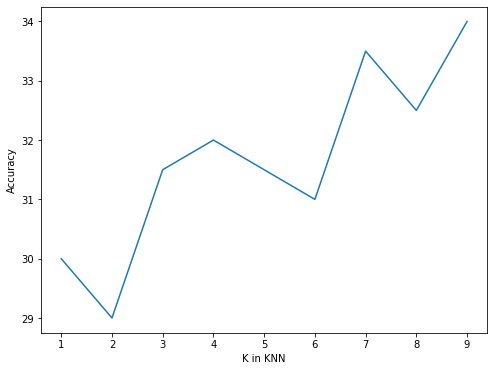

In [18]:
# plotting results 
plt.figure(figsize=(8, 6))
plt.plot(range(1, k), accuracy_mat)
plt.xlabel('K in KNN')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# maximum accuracy:
max_acc = np.max(accuracy_mat)
max_index = np.argmax(accuracy_mat) + 1

print('maximum accuracy is for k =', '[', max_index,']', 'and its value is =', '[', max_acc, ']')

maximum accuracy is for k = [ 9 ] and its value is = [ 34.0 ]
